In [1]:
from keras.datasets import imdb #  imported imdb  data set from keras dataset
import pandas as pd   # import pandas 
import numpy as np # import numpy

Using TensorFlow backend.


In [2]:
type(imdb) # type of our data set 

module

In [3]:
(train_data,train_label),(test_data,test_label) = imdb.load_data(num_words = 10000) # our dataset is tuple form

In [4]:
print('Shape of train_data ',train_data.shape)
print('Dimention of train_data',train_data.ndim)

Shape of train_data  (25000,)
Dimention of train_data 1


In [5]:
print('Shape of train_data ',train_label.shape)
print('Dimention of train_data',train_label.ndim)

Shape of train_data  (25000,)
Dimention of train_data 1


In [6]:
print('Shape of test data ',test_data.shape)
print('shape of test label',test_data.ndim)


Shape of test data  (25000,)
shape of test label 1


In [7]:
print('Shape of test data ',test_label.shape)
print('shape of test label',test_label.ndim)


Shape of test data  (25000,)
shape of test label 1


In [8]:
def vectorize_sequences(sequences, dimension=10000):        # create a function that will return matrix of ourdate
    results = np.zeros((len(sequences), dimension))   # zero vector created, row: 25000 and columns: 10000
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.      # it will assignment 1s where 'i' w.r.t squence(alternative [232,2,443])
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [9]:
print('X train ',x_train.shape)
print('X test',x_test.shape)

X train  (25000, 10000)
X test (25000, 10000)


In [10]:
y_train = np.asarray(train_label).astype('float32')    
y_test = np.asarray(test_label).astype('float32')     

### Architure of Neural Network

In [11]:
from keras import models   
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # 16 hidden layers
model.add(layers.Dense(16, activation='relu'))      # again densely conected 16 hidden layers
model.add(layers.Dense(1, activation='sigmoid')) # why 1 because of sigmoid function.

### Compilation of our model


In [12]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### validation: unseen data for both test and training
- x--val start 0 to 10000 columns
- partial x train start 10000 to 25000 columns



In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [14]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 309us/step - loss: 0.5431 - accuracy: 0.7685 - val_loss: 0.4328 - val_accuracy: 0.8255
Epoch 2/20
15000/15000 [==============================] - 4s 264us/step - loss: 0.3247 - accuracy: 0.8994 - val_loss: 0.3361 - val_accuracy: 0.8658
Epoch 3/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.2284 - accuracy: 0.9277 - val_loss: 0.2836 - val_accuracy: 0.8882
Epoch 4/20
15000/15000 [==============================] - 3s 202us/step - loss: 0.1770 - accuracy: 0.9448 - val_loss: 0.2957 - val_accuracy: 0.8804
Epoch 5/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.1461 - accuracy: 0.9541 - val_loss: 0.2824 - val_accuracy: 0.8872
Epoch 6/20
15000/15000 [==============================] - 3s 201us/step - loss: 0.1198 - accuracy: 0.9625 - val_loss: 0.3055 - val_accuracy: 0.8792
Epoch 7/20
15000/15000 [==============================] - 3s 

In [16]:
history_dic = history.history

In [17]:
type(history_dic)

dict

In [18]:
history_dic.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [19]:
import matplotlib.pyplot as plt

In [20]:
loss_values =  history_dic['loss']
val_loss_values = history_dic['val_loss']

In [21]:
epochs = range(1, len(loss_values) + 1)    # len(loss_values) : total 20 batch we run, it show each of loss in epoch

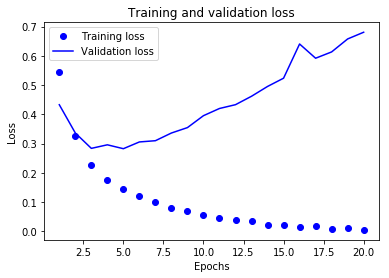

In [22]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

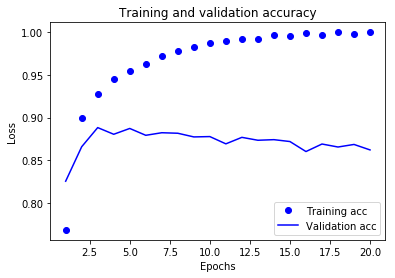

In [23]:
acc_values = history_dic['accuracy']
val_acc_values = history_dic['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()